<a href="https://colab.research.google.com/github/trq11137/new-ML/blob/main/_DiabetesNEwFullWork(T).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

import shap
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [74]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset import


In [75]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset-of-Diabetes.csv") 

In [76]:


df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [77]:
df['CLASS'].value_counts()


Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

Replace 

In [78]:
df['CLASS'] = df['CLASS'].str.replace("N ","N")
df['CLASS'] = df['CLASS'].str.replace("Y ","Y")
df['Gender'] = df['Gender'].str.replace("f","F")

In [79]:
#now check the unique value of gender
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [80]:
#now check the unique value of gender
df['CLASS'].unique()



array(['N', 'P', 'Y'], dtype=object)

information about dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


Here we find class and Gender has object value so we need to convert them into int

# **Label Encoder**

In [82]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [84]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [85]:
df.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.565000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,1.741000
std,240.397673,3.380758e+06,0.496005,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.631124
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,2.000000
max,800.000000,7.543566e+07,1.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,2.000000


Visualizing aspects of the **dataset**

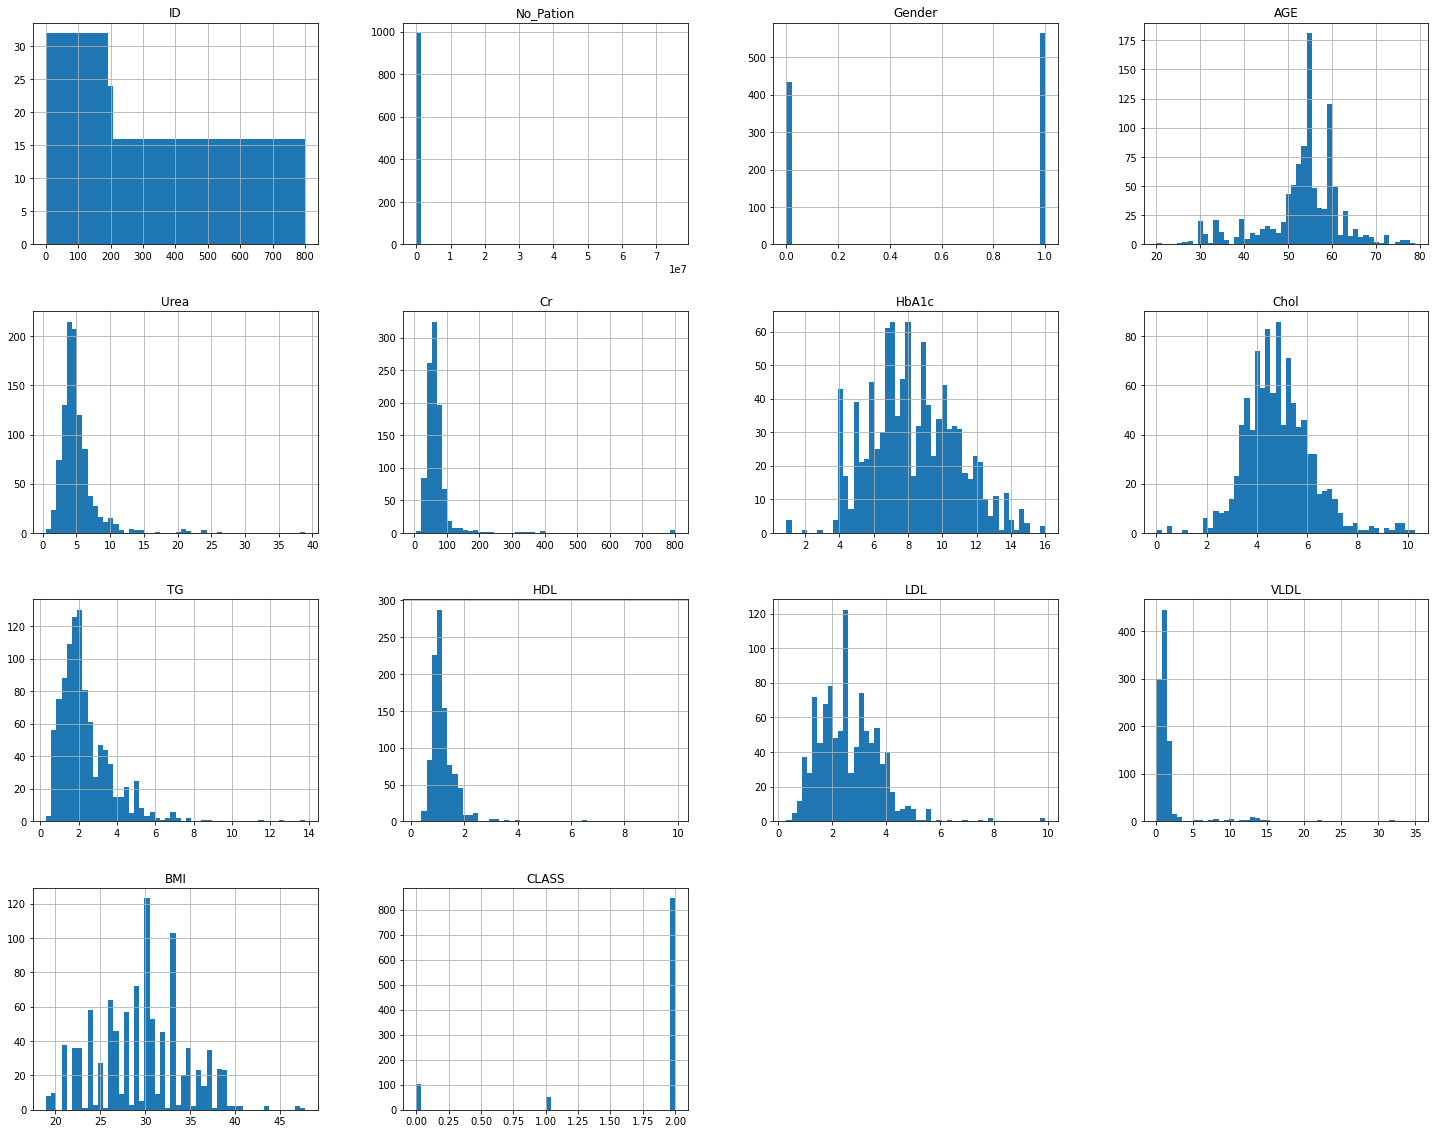

In [86]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

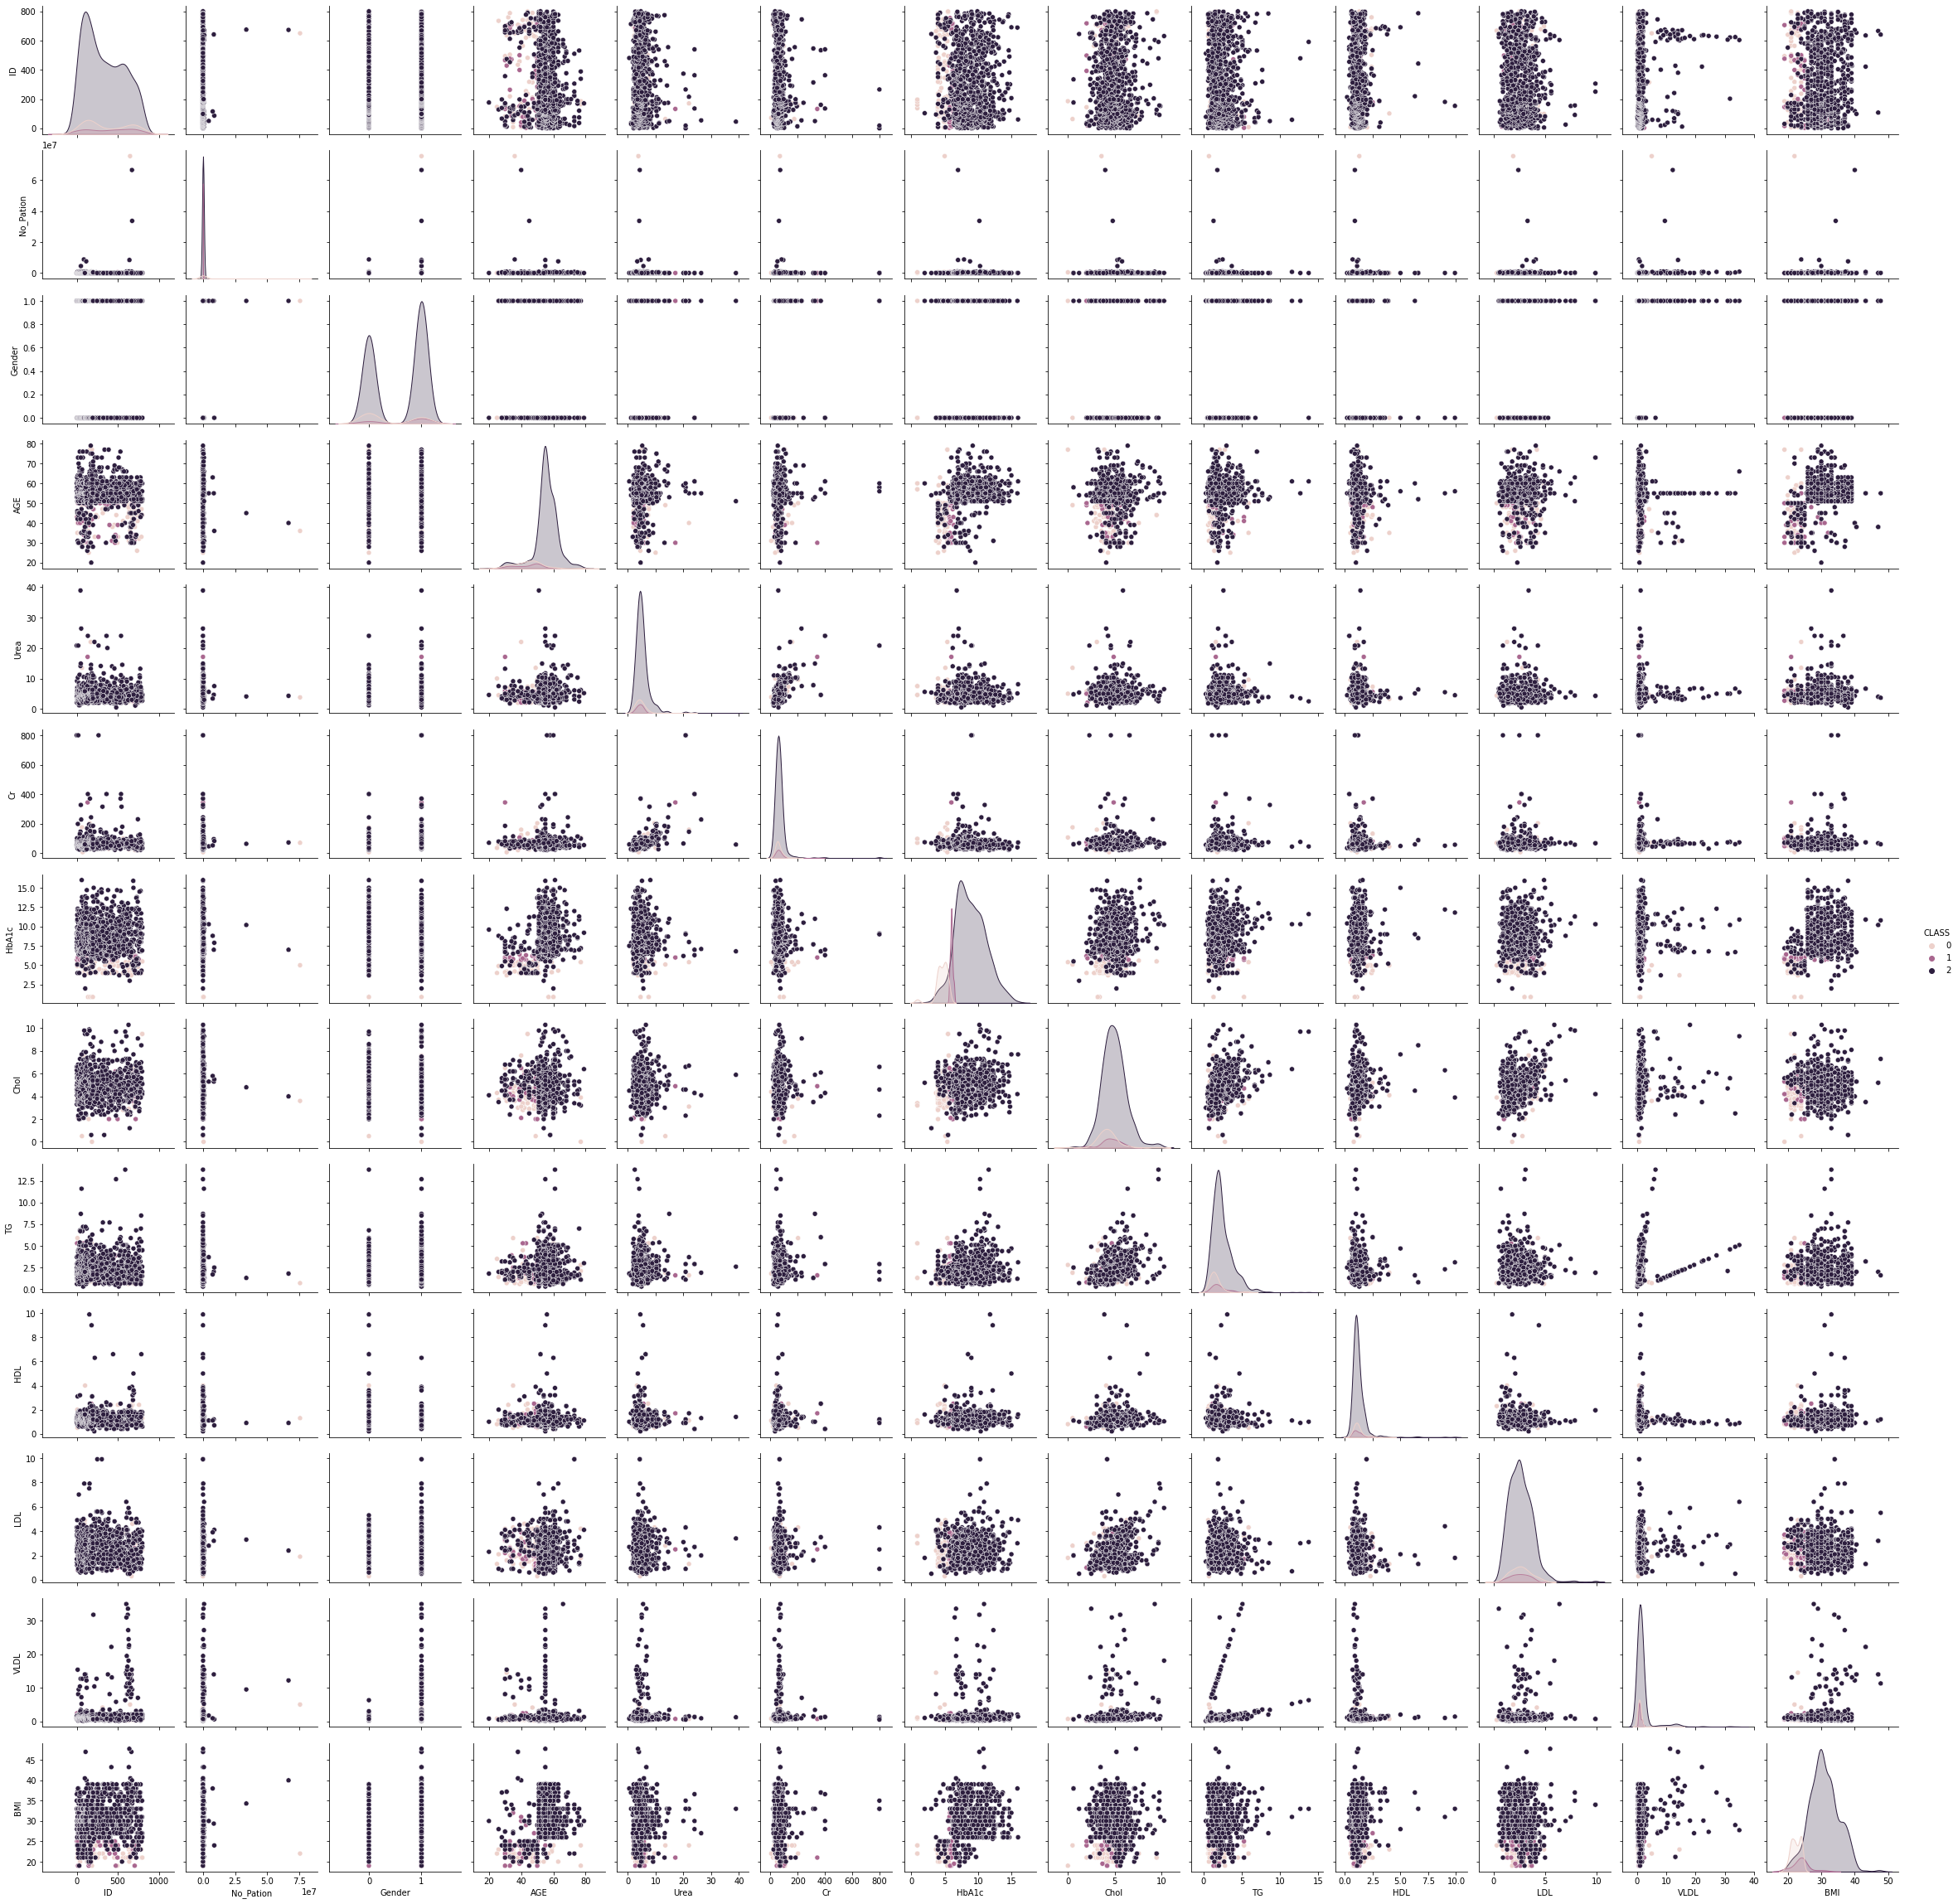

In [87]:
sns.pairplot(df, hue="CLASS")
plt.show()

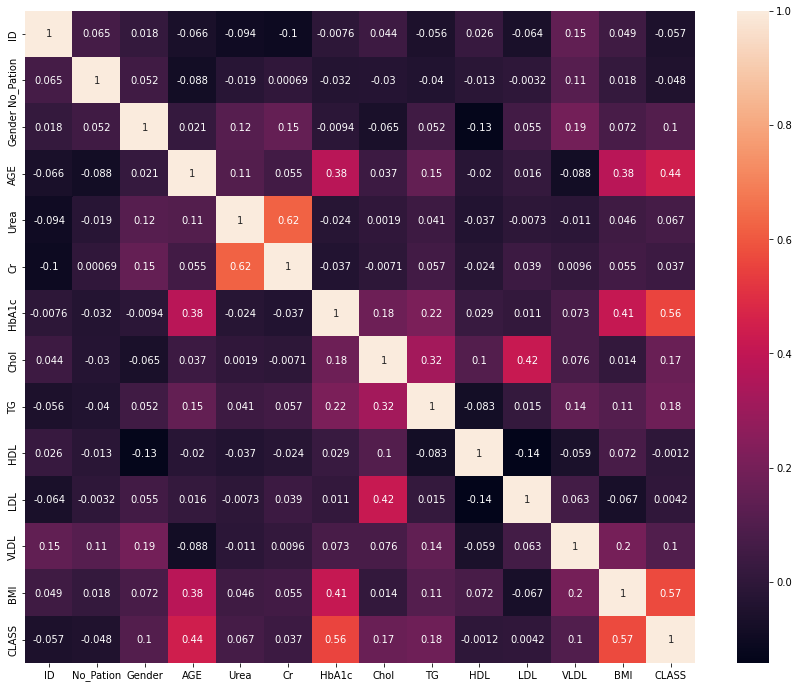

In [88]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

2    844
0    103
1     53
Name: CLASS, dtype: int64

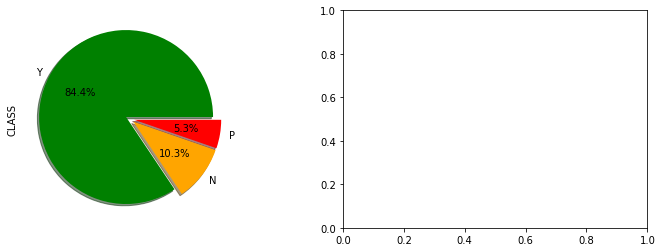

In [89]:
p_colors = ['green', 'orange', 'red']
risk_order = ["Y", "N", "P"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["CLASS"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
df['CLASS'].value_counts()




In [90]:
df.groupby('CLASS').mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,368.252427,815851.990291,0.378641,44.233010,4.680583,62.796117,4.560194,4.268932,1.625243,1.227184,2.625243,0.943689,22.374757
1,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
2,333.624408,216955.928910,0.580569,55.305687,5.217468,69.873223,8.878270,4.953104,2.452026,1.206872,2.615213,2.020616,30.811517


Removing duplicated data points
 if find any


```

**bold text**

In [91]:
print(f"There are {df.duplicated().sum()} duplicates data")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

There are 0 duplicates data


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS


finding is null value avilabe

In [92]:
df.isnull().sum()


ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

**Creating a test set**

In [93]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [94]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix 

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.067865,0.027471,-0.101066,-0.094149,-0.106060,0.004906,0.040743,-0.067962,0.037971,-0.053425,0.165359,0.052157,-0.073182
No_Pation,0.067865,1.000000,0.054761,-0.099716,-0.021757,-0.000959,-0.033893,-0.033421,-0.043158,-0.014888,-0.005811,0.116904,0.020250,-0.053966
Gender,0.027471,0.054761,1.000000,0.030686,0.106466,0.138563,-0.002217,-0.034518,0.060131,-0.115436,0.045791,0.198454,0.083104,0.105021
AGE,-0.101066,-0.099716,0.030686,1.000000,0.120189,0.079449,0.380464,0.021970,0.137221,-0.018662,-0.000046,-0.091604,0.376386,0.444265
Urea,-0.094149,-0.021757,0.106466,0.120189,1.000000,0.629917,-0.017970,0.023237,0.051066,-0.059633,-0.007830,-0.010185,0.085090,0.079439
Cr,-0.106060,-0.000959,0.138563,0.079449,0.629917,1.000000,-0.018975,0.012263,0.058873,-0.047822,0.032981,0.010572,0.070922,0.053666
HbA1c,0.004906,-0.033893,-0.002217,0.380464,-0.017970,-0.018975,1.000000,0.177203,0.191958,0.020030,0.014393,0.052549,0.401686,0.556460
Chol,0.040743,-0.033421,-0.034518,0.021970,0.023237,0.012263,0.177203,1.000000,0.325117,0.116566,0.445820,0.090495,0.027122,0.174615
TG,-0.067962,-0.043158,0.060131,0.137221,0.051066,0.058873,0.191958,0.325117,1.000000,-0.090999,0.025781,0.141630,0.089560,0.192007
HDL,0.037971,-0.014888,-0.115436,-0.018662,-0.059633,-0.047822,0.020030,0.116566,-0.090999,1.000000,-0.122354,-0.061943,0.061891,-0.003803


In [95]:
correlation_matrix["CLASS"].sort_values()


ID          -0.073182
No_Pation   -0.053966
HDL         -0.003803
LDL          0.003541
Cr           0.053666
Urea         0.079439
VLDL         0.097704
Gender       0.105021
Chol         0.174615
TG           0.192007
AGE          0.444265
HbA1c        0.556460
BMI          0.566351
CLASS        1.000000
Name: CLASS, dtype: float64

In [96]:
train_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
474,30,23981,0,54,1.2,25,7.9,2.0,1.9,0.9,2.5,0.7,33.0,2
694,223,23350,1,66,4.6,50,11.0,3.5,0.6,0.8,2.5,0.3,26.0,2
249,76,9903,1,73,4.3,79,6.0,5.3,1.4,1.5,3.2,0.6,27.0,2
309,290,24068,1,54,9.9,159,8.8,5.2,1.6,1.0,3.5,0.7,27.0,2
733,217,21761,0,59,5.7,86,9.3,5.3,2.7,1.0,3.2,1.2,31.0,2


**Rescaling or standardizing attributes**

In [97]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.627034,0.000237,0.0,0.480769,0.109375,0.050378,0.264901,0.407767,0.048387,0.250000,0.114583,0.011461,0.173913,0.0
1,0.918648,0.000452,1.0,0.019231,0.104167,0.070529,0.264901,0.359223,0.088710,0.102273,0.187500,0.014327,0.139130,0.0
2,0.524406,0.000634,0.0,0.480769,0.109375,0.050378,0.264901,0.407767,0.048387,0.250000,0.114583,0.011461,0.173913,0.0
3,0.849812,0.001160,0.0,0.480769,0.109375,0.050378,0.264901,0.407767,0.048387,0.250000,0.114583,0.011461,0.173913,0.0
4,0.629537,0.000452,1.0,0.153846,0.171875,0.050378,0.264901,0.475728,0.056452,0.068182,0.177083,0.008596,0.069565,0.0


In [98]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0.627034,0.000237,0.0,0.480769,0.109375,0.050378,0.264901,0.407767,0.048387,0.250000,0.114583,0.011461,0.173913,0.0
1,0.918648,0.000452,1.0,0.019231,0.104167,0.070529,0.264901,0.359223,0.088710,0.102273,0.187500,0.014327,0.139130,0.0
2,0.524406,0.000634,0.0,0.480769,0.109375,0.050378,0.264901,0.407767,0.048387,0.250000,0.114583,0.011461,0.173913,0.0
3,0.849812,0.001160,0.0,0.480769,0.109375,0.050378,0.264901,0.407767,0.048387,0.250000,0.114583,0.011461,0.173913,0.0
4,0.629537,0.000452,1.0,0.153846,0.171875,0.050378,0.264901,0.475728,0.056452,0.068182,0.177083,0.008596,0.069565,0.0


In [99]:
pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
from featurewiz import featurewiz


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (1000, 14)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or lo

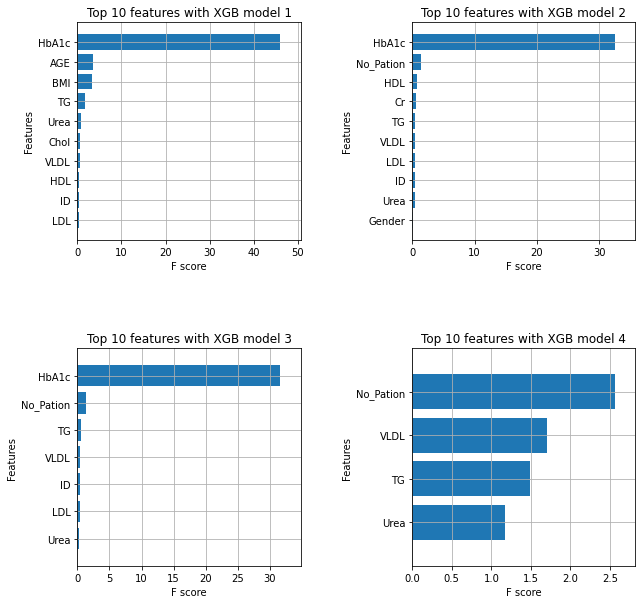

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 7 important features:
['HbA1c', 'AGE', 'BMI', 'No_Pation', 'HDL', 'TG', 'VLDL']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 7 important features and a train dataframe


In [101]:
target = 'CLASS'
 
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [102]:
print(features)


['HbA1c', 'AGE', 'BMI', 'No_Pation', 'HDL', 'TG', 'VLDL']


In [103]:
X = df.drop( 'CLASS', axis=1)
y = df['CLASS']


In [104]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [105]:
#Defining the machine learning models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth = 2)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model5 = GaussianNB()
model6 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model7 = MLPClassifier(random_state=1, max_iter=300)
model8=AdaBoostClassifier(random_state=96)
model9=RandomForestClassifier(max_depth=2, random_state=0)

In [106]:
#Training the machine learning models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)
model9.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [107]:
#Making the prediction
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)
y_pred8 = model8.predict(X_test)
y_pred9 = model9.predict(X_test)

In [108]:
#Confusion matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred1)
cm_DecisionTree = confusion_matrix(y_test, y_pred2)
cm_SupportVectorClass = confusion_matrix(y_test, y_pred3)
cm_KNN = confusion_matrix(y_test, y_pred4)
cm_gausian = confusion_matrix(y_test, y_pred5)
cm_xgb = confusion_matrix(y_test, y_pred6)
cm_mlp = confusion_matrix(y_test, y_pred7)
cm_adaboost = confusion_matrix(y_test, y_pred8)
cm_rf = confusion_matrix(y_test, y_pred9)

In [109]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [128]:
#aikhane accuracy ber korbi
print('Accuracy of Logistic Regression Model = ',model1.score(X_test,y_test))
print('Accuracy of Decision Tree Model = ',model2.score(X_test,y_test))
print('Accuracy of Support Vector Machine = ',model3.score(X_test,y_test))
print('Accuracy of k-NN Model = ',model4.score(X_test,y_test))
print('Accuracy of Gaussian Model = ',model5.score(X_test,y_test))


print('Accuracy Xgb Model = ',model6.score(X_test,y_test))
print('Accuracy of MLP model = ',model7.score(X_test,y_test))
print('Accuracy of Adaboost Model = ',model8.score(X_test,y_test))
print('Accuracy of Random Forest Model = ',model9.score(X_test,y_test))

Accuracy of Logistic Regression Model =  0.845
Accuracy of Decision Tree Model =  0.925
Accuracy of Support Vector Machine =  0.845
Accuracy of k-NN Model =  0.835
Accuracy of Gaussian Model =  0.115
Accuracy Xgb Model =  0.99
Accuracy of MLP model =  0.84
Accuracy of Adaboost Model =  0.955
Accuracy of Random Forest Model =  0.905


In [129]:
#10-fold cross-validation 
kfold = model_selection.KFold(n_splits=10)
result1 = model_selection.cross_val_score(model1, X_train, y_train, cv=kfold)
result2 = model_selection.cross_val_score(model2, X_train, y_train, cv=kfold)
result3 = model_selection.cross_val_score(model3, X_train, y_train, cv=kfold)
result4 = model_selection.cross_val_score(model4, X_train, y_train, cv=kfold)
result5 = model_selection.cross_val_score(model5, X_train, y_train, cv=kfold)

result6 = model_selection.cross_val_score(model6, X_train, y_train, cv=kfold)
result7 = model_selection.cross_val_score(model7, X_train, y_train, cv=kfold)
result8 = model_selection.cross_val_score(model8, X_train, y_train, cv=kfold)
result9 = model_selection.cross_val_score(model9, X_train, y_train, cv=kfold)




In [130]:
#Printing the accuracies achieved in cross-validation
print('Accuracy of Logistic Regression Model = ',result1.mean())
print('Accuracy of Decision Tree Model = ',result2.mean())
print('Accuracy of Support Vector Machine = ',result3.mean())
print('Accuracy of k-NN Model = ',result4.mean())
print('Accuracy of Gaussian Model = ',result5.mean())


print('Accuracy Xgb Model = ',result6.mean())
print('Accuracy of MLP model = ',result7.mean())
print('Accuracy of Adaboost Model = ',result8.mean())
print('Accuracy of Random Forest Model = ',result9.mean())

Accuracy of Logistic Regression Model =  0.8412499999999999
Accuracy of Decision Tree Model =  0.9212499999999999
Accuracy of Support Vector Machine =  0.84375
Accuracy of k-NN Model =  0.8612499999999998
Accuracy of Gaussian Model =  0.19124999999999998
Accuracy Xgb Model =  0.9887500000000001
Accuracy of MLP model =  0.7474999999999999
Accuracy of Adaboost Model =  0.8800000000000001
Accuracy of Random Forest Model =  0.9199999999999999


for xgb boost algorithm

[[ 21   0   0]
 [  0   9   1]
 [  1   0 168]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        10
           2       0.84      1.00      0.92       169

    accuracy                           0.84       200
   macro avg       0.28      0.33      0.31       200
weighted avg       0.71      0.84      0.77       200



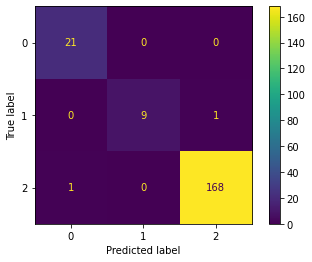

In [112]:

print(cm_xgb)
cm_display = ConfusionMatrixDisplay(cm_xgb).plot()
print(metrics.classification_report(y_test, y_pred1))



In [113]:

#import result of recall
recall=metrics.recall_score(y_test, y_pred6, average="weighted")
#import result of precesion
pre=metrics.precision_score(y_test, y_pred6, average="weighted")
#import result of f1
f1=metrics.f1_score(y_test, y_pred6, average="weighted")
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)

recall= 0.99
precision= 0.9902272727272728
f1= 0.9899265605875154


In [114]:
#import result of recall
recall=metrics.recall_score(y_test, y_pred6, average="macro")
#import result of precesion
pre=metrics.precision_score(y_test, y_pred6, average="macro")
#import result of f1
f1=metrics.f1_score(y_test, y_pred6, average="macro")
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)

recall= 0.9646942800788955
precision= 0.9828760982607138
f1= 0.9727318157786099


In [115]:
#import result of recall
recall=metrics.recall_score(y_test, y_pred6, average="micro")
#import result of precesion
pre=metrics.precision_score(y_test, y_pred6, average="micro")
#import result of f1
f1=metrics.f1_score(y_test, y_pred6, average="micro")
print('recall=',recall)
print('precision=',pre)
print('f1=',f1)

recall= 0.99
precision= 0.99
f1= 0.99


Error

In [116]:
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, y_pred6))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, y_pred6))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))



mse= 0.025
mae= 0.015
rmse= 0.15811388300841897


xgboost algorithm used


In [117]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [118]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
explainer = shap.TreeExplainer(model6)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

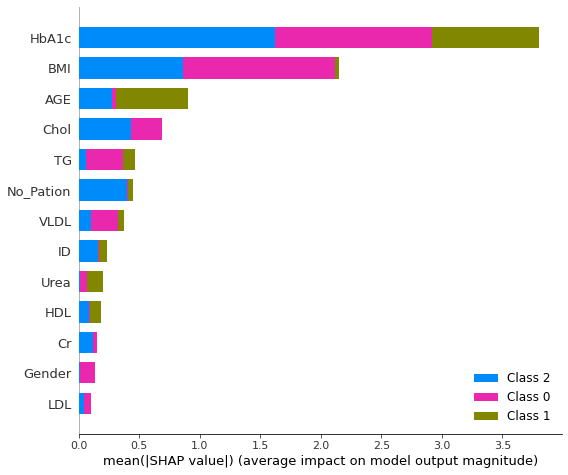

In [120]:

# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

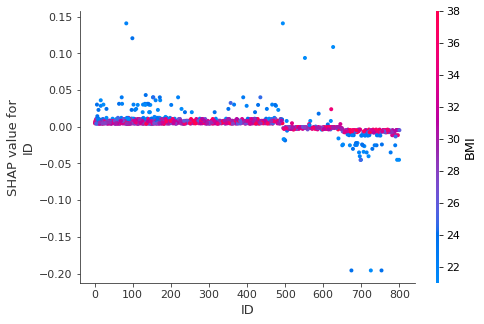

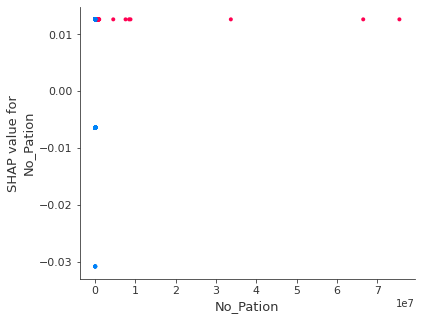

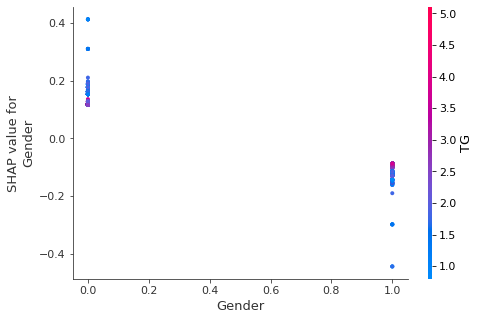

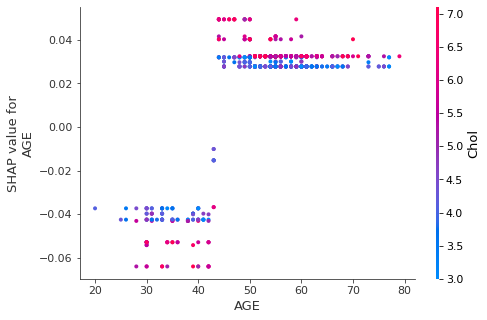

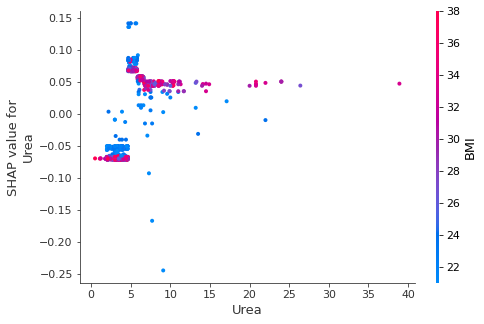

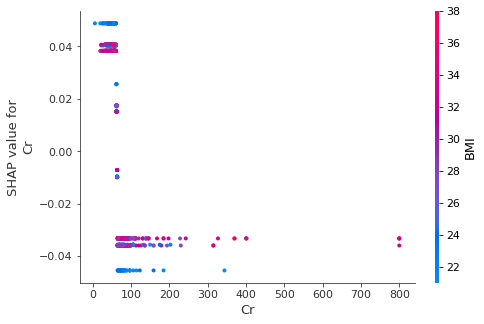

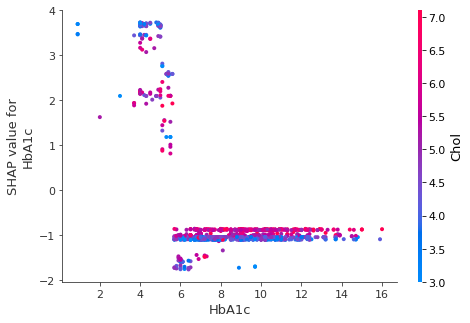

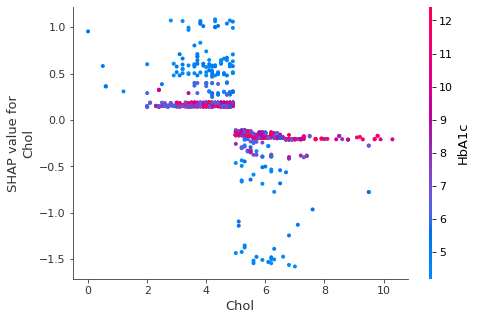

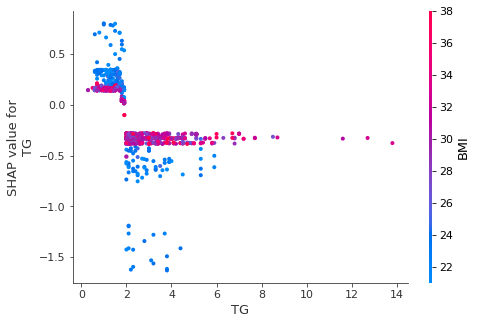

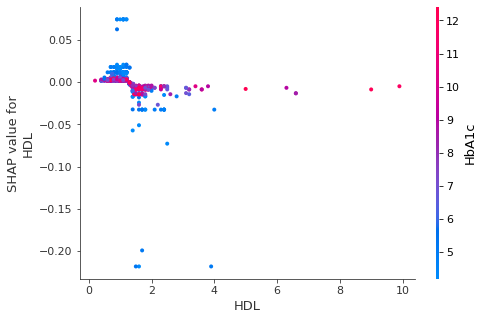

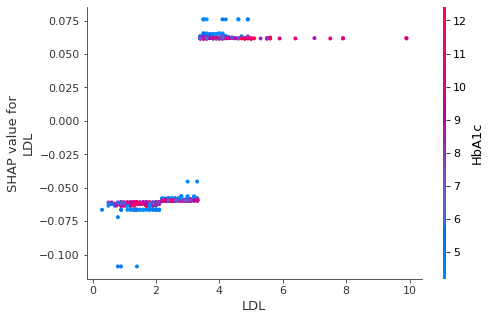

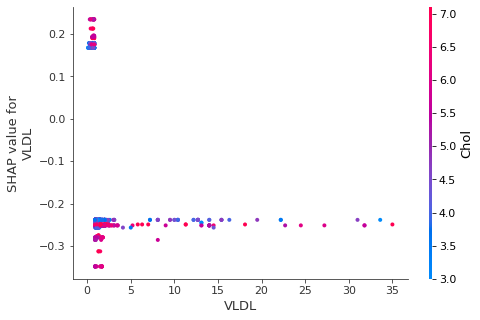

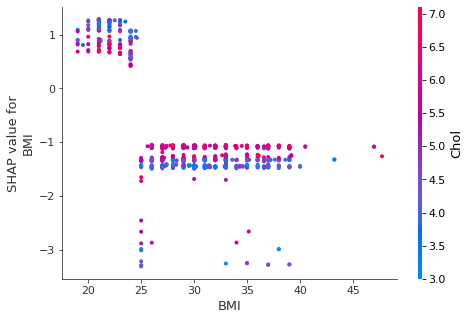

In [121]:
# Generate multiple dependence plots
for name in X_train.columns:
     shap.dependence_plot(name, shap_values[0], X)


In [122]:
shap.initjs()


test data accuracy

In [123]:
pip install explainerdashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
import explainerdashboard as expdb

In [125]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard


In [126]:
from explainerdashboard import InlineExplainer


In [127]:
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)